# Problem A

**Rocket Simulator**  

**Time Limit & Memory Limit: Refer to DOMjudge System**  

You are required to make a small rocket simulator. The rocket simulator simulates a rocket
travelling in a perfect straight line.  

The simulator is required to accept two commands at any point in time.  
* Set a velocity target at a particular point in time.
* Calculate the distance the rocket travel between two points in time, accounting for all velocity target that have been specified before.  

The rocket starts with zero velocity. The rocket will increase or decrease its velocity linearly
between two velocity targets. If there are no further velocity target, the rocket will keep its
current velocity. The rocket will not have negative velocity (it cannot reverse). No two sets
velocity command will have the same time.  

Linear velocity change means that the following holds true:  

$$\frac{v_{a}-v_{n}}{t_{a}-t_{n}} = \frac{v_{n+1}-v_{n}}{t_{n+1}-t_{n}} $$  

where $t_{n}$ and $t_{n+1}$ are the time for two consecutive velocity target, $v_{n}$ and $v_{n+1}$ are the velocity for the two consecutive velocity target, $t_{a}$ is any point in time between $t_{n}$ and $t_{n+1}$ and va is the velocity $a_{t}$ time $t_{a}$.  

The equation of total distance travelled between two points in time with start and end velocity,
assuming linear velocity change between the two time is:  

$$\frac{(v_{1}+v_{2}) \times (t_{2}-t_{1})}{2}$$  

where $t_{1}$ and $t_{2}$ is start time and end time respectively and $v_{1}$ and $v_{2}$ is the start and end velocity
respectively.  

**Input**  
The first line consists of one integer $N (1 ≤ N ≤ 2 × 10^{5})$, the number of commands for the
simulator.  

The next $N$ lines each represents a command. A set velocity target command starts with the letter $S$ followed by two floating point number $t$ $(0 ≤ t ≤ 10^{3})$ and $v$ $(0 ≤ v ≤ 10^{3})$, which are the time and the target velocity respectively.  

A calculate command starts with the letter $C$ followed by two floating point numbers $a, b$ $(0 ≤ a < b ≤ 10^{3})$ which are the start and end time respectively.

**Output**  
For each calculate command, output a line with a single number which is the total distance the
rocket travelled between the two time. Your answer will be considered correct if the absolute
or relative error doesn’t exceed $10^{6}$.  

|Sample Input | Sample Output |
|:------------|:--------------|
|6            |25             |
|S 5.0 10     |28.75          |
|C 0.0 5.0    |26.875         |
|C 2.5 6.0    |6.875          |
|S 7.0 2.5    |               |
|C 2.5 6.0    |               |
|C 6.0 8.0    |               |

## Inputs

In [1]:
inputarray = [[6],
              ['S',5.0,10.0],
              ['C',0.0, 5.0],
              ['C',2.5, 6.0],
              ['S',7.0, 2.5],
              ['C',2.5, 6.0],
              ['C',6.0, 8.0]
             ]

## Solution

In [48]:
import numpy as np

velgraph_x, velgraph_y = [], []
print('Answer:')

for i, item in enumerate(inputarray):
    #Initialize the initial velocity-time graph
    if i == 0:
        velgraph_x.append(0)
        velgraph_y.append(0)
    else:
        if item[0] == 'S':
            #Extend graph
            velgraph_x.append(item[1]) 
            velgraph_y.append(item[2])
            
        elif item[0] == 'C':
            displacement = 0
            #Copy graph
            velgraph_x_calc = velgraph_x.copy()
            velgraph_y_calc = velgraph_y.copy()
            #Loop through start & end time
            for time in item[1:]:
                #Check if start/end time exist in copied graph
                if time not in velgraph_x_calc:
                    #If no, check if start/end time is more than last target time
                    if time > max(velgraph_x_calc):
                        #If yes, append start/end time & velocity to end of graph 
                        velgraph_x_calc.append(time)
                        velgraph_y_calc.append(velgraph_y_calc[-1])
                    else:
                        #If no, insert start/end time & velocity in the middle of graph
                        insertindex = sum(np.array(velgraph_x_calc) < time)
                        velocitygradient = (velgraph_y_calc[insertindex]-velgraph_y_calc[insertindex-1])/(velgraph_x_calc[insertindex]-velgraph_x_calc[insertindex-1])
                        newvelocity = (time - velgraph_x_calc[insertindex-1])*velocitygradient + velgraph_y_calc[insertindex-1]
                        velgraph_x_calc.insert(insertindex, time)
                        velgraph_y_calc.insert(insertindex, newvelocity)
            #Compute displacement between start & end time
            start_idx = velgraph_x_calc.index(item[1])
            end_idx   = velgraph_x_calc.index(item[2])
            velgraph_x_calc = velgraph_x_calc[start_idx:end_idx+1]
            velgraph_y_calc = velgraph_y_calc[start_idx:end_idx+1]
            periodcount = len(velgraph_x_calc)
            for j in range(periodcount)[1:]:
                displacement += np.mean([velgraph_y_calc[j-1:j+1]])*(velgraph_x_calc[j]-velgraph_x_calc[j-1])
            #Print displacement
            print(displacement)

Answer:
25.0
28.75
26.875
6.875


# Problem B

**Boring Problem**  

**Time Limit & Memory Limit: Refer to DOMjudge System**  

Mina was attending algorithms class while the teacher was teaching on the famous problem which is called Find the Kth smallest number. This time teacher tried to make the lesson interesting and asked the students to find the Kth largest number. If you have a list with N number and you sorted it in decreasing order, then the Kth largest number is the element in the list with index K. Even with this change that the teacher has made, Mina still finds the lesson and problem boring. So, he decided to add some queries that challenges him more. Initially you start with an empty list. Then there are three types of queries:  

* X - which means add X to current list.
* Idx - which means you must restore the list which exist before applying query with index Idx, if Idx equals the index of current query, then nothing happens.
* K - which means print the Kth largest number, it’s guaranteed that K is ≤ the current size of list.  

Now, Mina found the problem more interesting but he doesn’t know how to solve it. Can you help him?  

**Input**  
First line contains one numbers Q (1 ≤ Q ≤ 106), number of queries. Then Q lines where qi in one of following formats:  
* X (1 ≤ X ≤ 106)
* Idx (1 ≤ Idx ≤ i), where i is the index of current query.
* K (1 ≤ K ≤ Len), where Len is the current size of list before applying this query.

**Output**  
For each query of type 3 print the Kth largest number.

|Sample Input|Sample Output|
|:-----------|:------------|
|9           |2            |
|1 1         |3            |
|1 2         |2            |
|1 3         |             |
|2 3         |             |
|3 1         |             |
|2 4         |             |
|3 1         |             |
|2 5         |             |
|3 1         |             |


## Inputs

In [ ]:
inputarray = [[9],
              [1,1],
              [1,2],
              [1,3],
              [2,3],
              [3,1],
              [2,4],
              [3,1],
              [2,5],
              [3,1]]

## Solution

In [ ]:
# import copy

# sortlist, listversion = [], []
# print('Answer:')

# for i, query in enumerate(inputarray):
#     if i == 0:
#         listversion.append(sortlist.copy())
#     else:
#         if query[0] == 1:
#             sortlist.append(query[1])
#         elif query[0] == 2:
#             if query[1] != i:
#                 sortlist = listversion[query[1]-1].copy()
#         elif query[0] == 3:
#             kthlarge = sortlist.copy()
#             kthlarge.sort(reverse=True)
#             print(kthlarge[query[1]-1])
#         listversion.append(sortlist.copy())
            

# Problem C

**Clash of Clans**  

**Time Limit & Memory Limit: Refer to DOMjudge System**

Nowadays, everyone plays clash of clans (a video game). In the game, everyone owns a castle and tries to protect it by building post guards around the castle. The enemy tries to penetrate a castle by destroying the post guards. Each post guard has a strength `H` and covers a circular area with center `(X, Y)` and radius `R`. The enemy needs exactly `H` attackers to destroy the post guard and it can shoot enemies in the area it covers. One attacker can only attack one post guard and the attacker will die after attacking the post guard. The enemy will send his attackers and destroy some post guards for making a safe path to the castle. The enemy always wants to minimize the number of attackers who die to make a safe path to the castle.  

![alt text](problemj.png "Title")

You and your enemy are in a `2D` plane which contains a rectangle which is bounded by `(0, 0)`, `(0, m)`, `(n, m)` and `(n, 0)`. Your castle is situated on the right side of `(n, 0)`, `(n, m)` line and the enemy is on the left side of `(0, 0)`, `(0, m)` line. The enemy can’t go around the rectangle to your castle, they must enter the rectangle by the left side of the rectangle and can’t leave the rectangle until reaching the right side of the rectangle. You have `D` dollars. You can invest `1` dollar to increase the strength of one post guard by `1`. You want to increase the strength of a few post guards in such a way that the minimum number of attackers needed by the enemy to make a path is maximized.  

**Input**  
The first line of the input contains an integer `T`, denoting the number of test cases. Each test case starts with `2` integers `n`, `m` in one line. The next line will have `2` integers `D` and `P`, which represent that you have `D` dollars and `P` post guards. Next `P` lines will have information of each post guard. Each of the next `P` lines will have `4` integers `X_i`, `Y_i`, `R_i` and `H_i`. `X_i`, `Y_i` is the coordinate of the center, `R_i` is the radius of the area it covers and `H_i` is the strength of the i-th post guard.  

**Constraints**  
* 1 ≤ T ≤ 5  
* 10 ≤ n, m ≤ 106  
* 1 ≤ D ≤ 109  
* 1 ≤ P ≤ 100  
* 1 ≤ X_i < n, 1 ≤ Y_i < m  
* 1 ≤ R_i ≤ 106, 1 ≤ H_i ≤ 109  


**Output**   
For each test case, print a line containing the case number and the minimum number of attackers needed by the enemy to make a path, if you increase the strength of a few post guards optimally.  


|Sample input   |Sample output   |
|:--------------|:---------------|
|2              |Case 1: 8       |
|10 10          |Case 2: 11      |
|2 2            |                |
|5 2 3 10       |                |
|3 7 3 6        |                |
|20 20          |                |
|13 5           |                |
|15 2 4 10      |                |
|12 9 6 6       |                |
|5 2 3 10       |                |
|6 16 5 2       |                |
|16 17 3 4      |                |

## Inputs

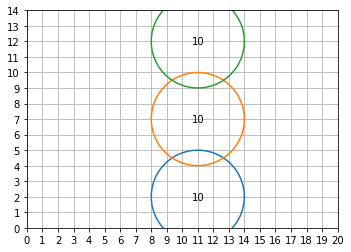

In [284]:
#Input
w, h = 20, 14
money, posts_count = 2, 3
posts = [(11, 2, 3, 10), (11, 7, 3, 10), (11, 12, 3, 10)] #(x, y, radius, health)
visualize_map(posts, w, h)   

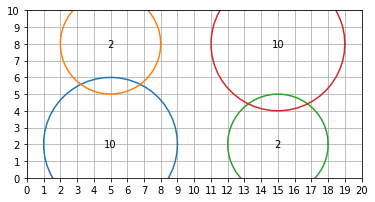

In [95]:
#Input
w, h = 20, 10
money, posts_count = 2, 4
posts = [(5,2,4,10),(5,8,3,2),(15,2,3,2),(15,8,4,10)] ##(x, y, radius, health)
visualize_map(posts, w, h) 

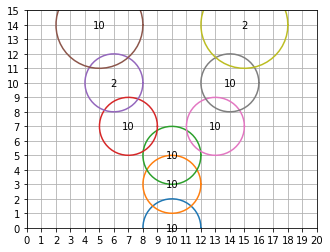

In [450]:
#Input
w, h = 20, 15
money, posts_count = 2, 8
posts = [(10,0,2,10),(10,3,2,10),(10,5,2,10),
         (7,7,2,10),(6,10,2,2),(5,14,3,10),
         (13,7,2,10),(14,10,2,10),(15,14,3,2)] ##(x, y, radius, health)
visualize_map(posts, w, h) 

In [449]:
# #Input
# w, h = 42, 14
# money, posts_count = 2, 8
# posts = [(1,1,2,10),
#          (8,1,2,10), (8,4,2,10), (8,7,2,10), (8,10,2,10), (8,13,2,2), 
#          (11,4,2,2),   (14,4,2,10), (17,4,2,10),
#          (11,10,2,10),  (14,10,2,10), (17,10,2,2),
#          (20,1,2,2), (20,4,2,10), (20,7,2,10), (20,10,2,10), (20,13,2,10), 
#          (27,1,2,10), (27,4,2,10), (27,7,2,10), (27,10,2,10), (27,13,2,2), 
#          (34,1,2,2), (34,4,2,10), (34,7,2,10), (34,10,2,10), (34,13,2,10)] ##(x, y, radius, health)
# visualize_map(posts, w, h) 

In [405]:
# #Input
# w, h = 60, 27
# money, posts_count = 2, 8
# posts = [(8,1,2,10), (8,4,2,10), (8,7,2,10), (8,10,2,10), (8,13,2,10), (8,16,2,10),(8,19,2,10), (8,22,2,10), (8,25,2,2),
#          (11,3,2,2),   (14,3,2,10), (17,3,2,10),
#          (11,9,2,10),  (14,9,2,10), (17,9,2,2),
#          (11,15,2,2),  (14,15,2,10), (17,15,2,10),
#          (11,21,2,10), (14,21,2,10), (17,21,2,2),
#          (20,1,2,2), (20,4,2,10), (20,7,2,10), (20,10,2,10), (20,13,2,10), (20,16,2,10), (20,19,2,10), (20,22,2,10), (20,25,2,10),
#          (27,1,2,10), (27,4,2,10), (27,7,2,10), (27,10,2,10), (27,13,2,10), (27,16,2,10), (27,19,2,10), (27,22,2,10), (27,25,2,2),
#          (34,1,2,2), (34,4,2,10), (34,7,2,10), (34,10,2,10), (34,13,2,10), (34,16,2,10), (34,19,2,10), (34,22,2,10), (34,25,2,10),
#          (41,1,2,10), (41,4,2,10), (41,7,2,10), (41,10,2,10), (41,13,2,10), (41,16,2,10), (41,19,2,10), (41,22,2,10), (41,25,2,2),
#          (48,1,2,2), (48,4,2,10), (48,7,2,10), (48,10,2,10), (48,13,2,10), (48,16,2,10), (48,19,2,10), (48,22,2,10), (48,25,2,10),
#          (55,1,2,10), (55,4,2,10), (55,7,2,10), (55,10,2,10), (55,13,2,10), (55,16,2,10), (55,19,2,10), (55,22,2,10), (55,25,2,2)] ##(x, y, radius, health)
# visualize_map(posts, w, h) 

## Solution

In [451]:
import pandas as pd
import matplotlib.pyplot as plt

In [452]:
def visualize_map(posts=posts, w=w, h=h, select=[], title=''):
    angle = np.linspace(0, 2 * np.pi) 
    figure, ax = plt.subplots() 

    for i, post in enumerate(posts):
        if select:
            if i+1 not in select:
                continue
        radius = post[2]
        x = radius * np.cos(angle) + post[0]
        y = radius * np.sin(angle) + post[1]
        ax.plot(x, y) 
        ax.text(post[0], post[1], post[3], ha='center', va='center')
        ax.set_xlim([0,w])
        ax.set_ylim([0,h])
        ax.set_xticks(range(w+1))
        ax.set_yticks(range(h+1))
        ax.set_aspect(1)
    plt.title(title)
    plt.grid()
    plt.show()

def create_connectedness_matrix(posts=posts, w=w, h=h):
    #instantiate
    cMatrix = pd.DataFrame([])
    #tower to tower connectedness
    for i, t1 in enumerate(posts):
        for j, t2 in enumerate(posts):
            if i != j:
                cMatrix.loc[i+1, str(j+1)] = check_two_tower_connectedness(t1=t1, t2=t2)
            else:
                cMatrix.loc[i+1, str(j+1)] = 0
    #south to tower connectedness
    for i, t1 in enumerate(posts):
        if t1[1]+t1[2] >= h:
            cMatrix.loc[i+1, str(0)] = 1
            cMatrix.loc[0, str(i+1)] = 1
        else:
            cMatrix.loc[i+1, str(0)] = 0
            cMatrix.loc[0, str(i+1)] = 0
    #north to tower connectedness
    n = len(posts)+1
    for i, t1 in enumerate(posts):
        if t1[1]-t1[2] <= 0:
            cMatrix.loc[i+1, str(n)] = 1
            cMatrix.loc[n, str(i+1)] = 1
        else:
            cMatrix.loc[i+1, str(n)] = 0
            cMatrix.loc[n, str(i+1)] = 0
    #visual clean up
    cMatrix = cMatrix.sort_index()
    cMatrix = cMatrix[[str(x) for x in list(range(len(posts)+2))]]
    cMatrix = cMatrix.fillna(0)
    return cMatrix
            
def check_two_tower_connectedness(t1, t2):
    centroid_distance = ((t1[0]-t2[0])**2 + (t1[1]-t2[1])**2)**0.5 #pythagorean theorem
    combined_radii    = t1[2]+t2[2]
    if centroid_distance > combined_radii:
        connectedness = 0
    else:
        connectedness = 1
    return connectedness
    
cMatrix = create_connectedness_matrix(posts, w, h)    
cMatrix

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [453]:
def get_fences(n, cMatrix=cMatrix, chain=[]):
    '''fence = north-south chains'''
    #instantiate (start from south)
    if len(chain) == 0:
        global chains
        chains = []
        chain = chain + [n+1]
        
    #OPTIMIZATION: list out unchained
    unchain = [x for x in list(range(n+1)) if x not in chain]
    
    #OPTIMIZATION: list out connected among unchained
    unchain_connected = [x for x in unchain if cMatrix.loc[chain[-1], str(x)] == 1]
    
    #output
    if chain[-1]==0:
        chains.append(chain[-1::-1])
    #keep going
    if unchain_connected:
        for t in unchain_connected:
            get_fences(n, cMatrix, chain+[t])
    
    return chains

fences = get_fences(len(posts), cMatrix)
fences

[[0, 6, 5, 4, 3, 2, 1, 10], [0, 9, 8, 7, 3, 2, 1, 10]]

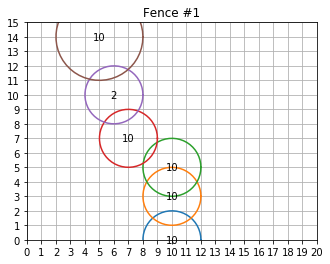

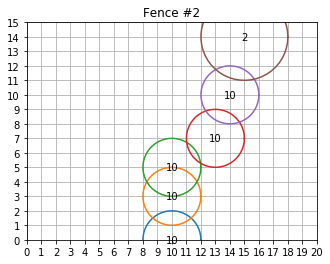

In [454]:
for i, fence in enumerate(fences):
    visualize_map(posts, w, h, fence, f'Fence #{i+1}') 

In [455]:
def get_offensive_strategies(w, h, posts, remaining, strat=[], strat_resource=0):
    #instantiate (start from south)
    if len(strat) == 0:
        global best_strat, best_resource, n_trials
        best_strat, best_resource = [], 9999999999
    
    #iterate each posts
    for t in remaining:
        #OPTIMIZATION: skip permutation ie monotonous strat sequence only
        if strat:
            if strat[-1] >= t:
                continue
        #add post to strat
        strat = strat + [t]
        strat_resource = strat_resource + posts[t-1][3]
        #better than best?
        if strat_resource < best_resource:
            #breach: output
            if check_for_breach([x+1 for x in range(len(posts)) if x+1 not in strat], posts, w, h):
                best_strat = strat.copy()
                best_resource = strat_resource
            #not breach: keep going
            else:
                get_offensive_strategies(w, h, posts, [x for x in remaining if x not in strat], strat, strat_resource)
        #remove post to strat
        n_trials += 1
        print(f'Trial #{n_trials} current_best={best_resource}, trial_strat={strat}')
        strat.remove(t)
        strat_resource = strat_resource - posts[t-1][3]
    
    return best_strat, best_resource

def check_for_breach(remaining, posts, w, h):
    posts = [x for i, x in enumerate(posts) if i+1 in remaining]
    cMatrix = create_connectedness_matrix(posts, w, h)  
    fences = get_fences(len(posts), cMatrix)
    return False if fences else True

#OPTIMIZATION: sort less expensive first
sorted_posts   = list(pd.DataFrame(posts, columns=['x','y','rad','health']).sort_values(['health']).index)

#OPTIMIZATION: exclude irrelevant 
posts_in_fence = list(set([x for sublist in fences for x in sublist]))
posts_in_fence = [x for x in posts_in_fence if x != 0 and x != len(posts)+1]
posts_in_fence = [x+1 for x in sorted_posts if x+1 in posts_in_fence]

def get_total_perm(n):
    total = 0
    for i in range(n+1):
        perm = 1
        for j in range(i):
            perm = perm*(j+1)
        total = total + perm
    total = str(total)
    total = total[0] + '.' + total[1:3] + 'E+' + str(len(total)-1)
    return total

global n_trials
n_trials = 0
total = get_total_perm(len(posts))
best_strat, best_resource = get_offensive_strategies(w, h, posts, posts_in_fence)
    
print(f'{n_trials} out of {total} possible strategies')
best_strat, best_resource

Trial #1 current_best=4, trial_strat=[5, 9]
Trial #2 current_best=4, trial_strat=[5, 6]
Trial #3 current_best=4, trial_strat=[5, 7]
Trial #4 current_best=4, trial_strat=[5, 8]
Trial #5 current_best=4, trial_strat=[5]
Trial #6 current_best=4, trial_strat=[9]
Trial #7 current_best=4, trial_strat=[1]
Trial #8 current_best=4, trial_strat=[2]
Trial #9 current_best=4, trial_strat=[3]
Trial #10 current_best=4, trial_strat=[4]
Trial #11 current_best=4, trial_strat=[6]
Trial #12 current_best=4, trial_strat=[7]
Trial #13 current_best=4, trial_strat=[8]
13 out of 4.09E+5 possible strategies


([5, 9], 4)

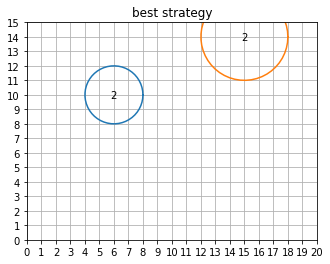

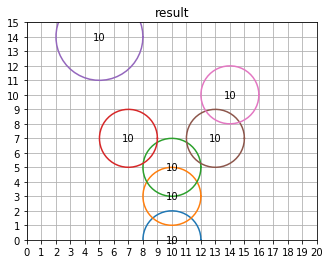

In [456]:
visualize_map(posts, w, h, best_strat, title='best strategy')
visualize_map(posts, w, h, [i+1 for i,x in enumerate(posts) if i+1 not in best_strat], title='result') 

# Problem D

**Polynomial Extrapolation**  

**Time Limit & Memory Limit: Refer to DOMjudge System**  

We are given a sequence `𝑎0, 𝑎1, 𝑎2, …., 𝑎𝑁`. For each `𝑖` between 0 to 𝑁 (inclusive) `𝑎𝑖` represents the value of the polynomial `(𝐶𝑁−1∗ 𝑋𝑁−1 + 𝐶𝑁−2∗ 𝑋𝑁−2 + ...+ 𝐶2∗ 𝑋2 +𝐶1∗ 𝑋1 + 𝐶0∗ 𝑋0) % 10007` for `𝑋=𝑖`. Given `𝐾` let us compute the value of `𝑎𝐾`.  

**Input**  
Input starts with `T`, the number of test cases. Each test case consists of two lines. First line contains two integers `𝑁` and `K`. Second line contains `𝑁+1` integers representing the sequence `𝑎0, 𝑎1, 𝑎2, …., 𝑎𝑁`.

**Output**  
For each test case, output a single integer 𝑎𝐾 in a single line.  

Constraints
* `1≤𝑇≤ 100`
* `1≤𝑁≤ 20`
* `𝑁<𝐾≤ 1017`
* `0 ≤ 𝑎𝑖≤ 10007`
* `0 ≤ 𝐶𝑖≤ 10007` (Please note that even though `𝐶𝑖` will not be part of the input it is guaranteed that the coefficients of the polynomial will be in this range.)  

|Sample input   |Sample output   |
|:--------------|:---------------|
|6              |5               |
|2 5            |16              |
|0 1 2          |43              |
|3 4            |64              |
|0 1 4 9        |81              | 
|3 6            |3304            |
|1 3 7 13       |                |
|3 7            |                |
|1 4 9 16       |                |
|3 7            |                |
|4 9 16 25      |                |
|3 1000         |                |
|4 9 16 25      |                |


## Input

In [ ]:
import numpy as np

inputarray = [[6],
              [2, 5],
              [0, 1, 2],
              [3, 4],
              [0, 1, 4, 9],
              [3, 6],
              [1, 3, 7, 13],
              [3, 7],
              [1, 4, 9, 16],
              [3, 7],
              [4, 9, 16, 25],
              [3, 1000],
              [4, 9, 16, 25]]


## Solution

In [ ]:
# answers = []
# for caseno in range(inputarray[0][0]):
#     N = inputarray[(caseno+1)*2-1][0]
#     K = inputarray[(caseno+1)*2-1][1]
#     seq = inputarray[(caseno+1)*2]
#     matrix = []
#     for i in range(N+1):
#         equation = []
#         for j in range(N):
#             equation.append(i**(N-j-1))
#         matrix.append(equation)
#     A = np.array(matrix)
#     B = np.array(seq)
#     X = np.linalg.solve(A[:-1],B[:-1])
#     answer = []
#     for i in range(N):
#         answer.append(X[i]*K**(N-i-1))
#     answer = sum(answer) % 10007
#     answers.append(answer)

# print('Answer: {}'.format(answers))

# Problem E

**Flooding**  

**Time Limit & Memory Limit: Refer to DOMjudge System**  

You are making a 2D simulation. The simulated world is represented by an `n × m` grid. In the simulation, each cell can represent a house, a water source and a water barricade. The purpose of the simulator is to determine how many house or houses will be flooded given some water source.  

**Input**  
The first line of the input consists of two integers `n` and `m` `(0 ≤ n, m ≤ 1000)` which is the number of rows and column that represent the map. The next `n` line consists of a string of `m` characters which made up a grid which represent the map of the simulated world. In the grid, character `‘_’` (underscore) represents a cell of water source. Character `‘.’` represents a space in which the water can flow. Character `‘H’` represents a house. And character `‘#’` represents water barricade that water can’t traverse. The water source has infinite supply of water. The water can flow to all eight directions, up, up right, right, down right, down, down left, left and up left. The water can flow through a house. The water cannot flow through the water barricade and the water cannot flow outside the map.  

**Output**  
Print a single integer, the number of house or houses that will not be flooded.  

|Sample Input 1 | Sample Output 1 |
|:--------------|:----------------|
|10 10          |4                |
|..H#...__.     |                 |
|...#...__.     |                 |
|.H.#...__.     |                 |
|...#.H.__.     |                 |
|...#...__.     |                 |
|..H#...__.     |                 |
|...#...__.     |                 |
|.H.#H..__.     |                 |
|...#...__.     |                 |
|...#...__.     |                 |

## Inputs

In [ ]:
inputmap = [['.', '.', 'H', '#', '.', '.', '.', '_', '_', '.'],
            ['.', '.', '.', '#', '.', '.', '.', '_', '_', '.'],
            ['.', 'H', '.', '#', '.', '.', '.', '_', '_', '.'],
            ['.', '.', '.', '#', '.', 'H', '.', '_', '_', '.'],
            ['.', '.', '.', '#', '.', '.', '.', '_', '_', '.'],
            ['.', '.', 'H', '#', '.', '.', '.', '_', '_', '.'],
            ['.', '.', '.', '#', '.', '.', '.', '_', '_', '.'],
            ['.', 'H', '.', '#', 'H', '.', '.', '_', '_', '.'],
            ['.', '.', '.', '#', '.', '.', '.', '_', '_', '.'],
            ['.', '.', '.', '#', '.', '.', '.', '_', '_', '.']]

In [ ]:
inputmap = [['.', '.', '.', '.', '.', '.', '.', '_', '_', '.'],
            ['.', '#', '#', '#', '.', '.', '.', '_', '_', '.'],
            ['.', '#', '.', '#', '.', '.', '.', '_', '_', '.'],
            ['.', '#', '.', '#', '.', '.', '.', '_', '_', '.'],
            ['.', '#', '.', '#', '.', '.', '.', '_', '_', '.'],
            ['.', '#', 'H', '#', '.', '.', '.', '_', '_', '.'],
            ['.', '#', '.', '#', '#', '#', '.', '_', '_', '.'],
            ['.', '#', '#', '.', 'H', '#', '.', '_', '_', '.'],
            ['#', 'H', '#', '.', '#', '#', '.', '_', '_', '.'],
            ['#', '.', '#', '.', '#', '.', '.', '_', '_', '.']]

## Solution

In [ ]:
def spill(i, j, workmap, answer):
    u  = (max(i-1,0)  ,     j       )
    d  = (min(i+1,h-1),     j       )
    l  = (i           , max(j-1,0)  )
    r  = (i           , min(j+1,w-1))
    ul = (max(i-1,0)  , max(j-1,0)  )
    dl = (min(i+1,h-1), max(j-1,0)  )
    ur = (max(i-1,0)  , min(j+1,w-1))
    dr = (min(i+1,h-1), min(j+1,w-1))
    
    directions = [u,d,l,r,ul,dl,ur,dr]
    
    for direction in directions:
        if inputmap[direction[0]][direction[1]] != '_':
            if workmap[direction[0]][direction[1]] in ('.','H'):
                if workmap[direction[0]][direction[1]] == 'H':
                    answer += 1
                workmap[direction[0]][direction[1]] = '_'
                workmap, answer = spill(direction[0], direction[1], workmap, answer)
    
    return workmap, answer

import copy

answer = 0
h, w = len(map), len(map[0])
workmap = copy.deepcopy(inputmap)

for i in range(h):
    for j in range(w):
        if inputmap[i][j] == '_' and workmap[i][j] == '_':
            workmap, answer = spill(i, j, workmap, answer)
            
'original map', inputmap, 'flooded map', workmap, 'Answer: {} house{} flooded'.format(answer, 's' if answer > 1 else '')

# Problem F

**Minimum and Maximum Base**  

**Time Limit & Memory Limit: Refer to DOMjudge System**  

Given $n$ and $t$ you will have to find minimum and maximum positive integer bases in which $n!$ (Factorial $n$) has exactly $t$ zeros.

**Input**  
The input file contains `10000` lines of inputs. Each line contains two integers $n$ $(2 ≤ n ≤ 100000)$ and $t$ $(2 ≤ t ≤ 10000)$. Input is terminated by a line containing a two zeroes. This line should not be processed.

**Output**  
For each line of input, produce one line of output. This line should contain modulo `1000007` values of min and max. Here min is the smallest possible base where $n!$ has exactly $t$ zeroes and max is the largest possible base where $n!$ has exactly $t$ zeroes. If no such base is found, then print two `-1` instead.

|Sample Input|Sample Output|
|---|---|
|5 5|-1 -1|
|100 5|17 353355|
|0 0|



## Inputs

In [ ]:
inputarray = [[5,5],
              [100,5],
              [0,0]
             ]

## Solution

In [76]:
def config_of_n(integer, n):
    config = 0
    if not integer % n:
        config += 1
        config += config_of_n(integer / n, n)
    return config

2

In [57]:
not 10 % 5

True

In [ ]:
# def config_of_n(integer, n):
#     config = 0
#     if not integer % n:
#         config += 1
#         config += config_of_n(integer / n, n)
#     return config

# factorcount2, factorcount5 = 0, 0

# for case in inputarray[:-1]:
#     while factorcount2 < 
    

# Problem G

# Problem H

# Problem I

# Problem J

## Inputs

In [182]:
inputarray = [[9,1],
              [4,1],
              [4,2],
              [5,2],
              [5,0],
              [4,-1],
              [-5,-1],
              [-5,2],
              [-4,2],
              [-4,1]]

In [170]:
inputarray = [[4,1],
              [2,2],
              [2,1],
              [1,1],
              [1,2]]

## Solution

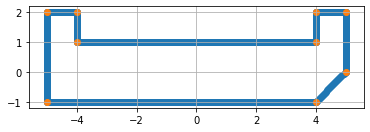

In [183]:
import matplotlib.pyplot as plt
import math

vertices_x = [row[0] for row in inputarray[1:]]
vertices_y = [row[1] for row in inputarray[1:]] 

def add_detail(vertices_x, vertices_y, min_len):
    vertices_x_added = []
    vertices_y_added = []
    for i in range(len(vertices_x)):
        distance = ((vertices_x[(i+1) % len(vertices_x)]-vertices_x[i])**2 + (vertices_y[(i+1) % len(vertices_x)]-vertices_y[i])**2)**0.5
        segments = math.ceil(distance/min_len)
        delta_x = (vertices_x[(i+1) % len(vertices_x)]-vertices_x[i])/segments
        delta_y = (vertices_y[(i+1) % len(vertices_x)]-vertices_y[i])/segments
        for j in range(segments):
            vertices_x_added.append(vertices_x[i]+(j+1)*delta_x)
            vertices_y_added.append(vertices_y[i]+(j+1)*delta_y)
    detailed_vertices_x = vertices_x + vertices_x_added
    detailed_vertices_y = vertices_y + vertices_y_added
    return detailed_vertices_x, detailed_vertices_y

detailed_vertices_x, detailed_vertices_y = add_detail(vertices_x, vertices_y, .05)

fig, ax = plt.subplots() 
ax.scatter(detailed_vertices_x, detailed_vertices_y)
ax.scatter(vertices_x, vertices_y)
ax.grid()
ax.set_aspect(1)
plt.show()

In [185]:
for i, vertex in enumerate(vertices_x):
    a = ((vertices_x[i]                      -vertices_x[(i+1) % len(vertices_x)])**2+(vertices_y[i]                      -vertices_y[(i+1) % len(vertices_x)])**2)**0.5
    b = ((vertices_x[(i-1) % len(vertices_x)]-vertices_x[(i+1) % len(vertices_x)])**2+(vertices_y[(i-1) % len(vertices_y)]-vertices_y[(i+1) % len(vertices_x)])**2)**0.5
    c = ((vertices_x[(i-1) % len(vertices_x)]-vertices_x[i]                      )**2+(vertices_y[(i-1) % len(vertices_y)]-vertices_y[i]                      )**2)**0.5
    angle = 360 - math.degrees(math.acos((a**2-b**2+c**2)/2/a/b))
    print(360 - angle)

89.99999999999994
90.0
90.0
116.56505117707798
95.71059313749964
90.0
90.0
90.0
90.0


In [207]:
pointpairs = [((0,0),(1,2)),
              ((0,0),(2,2)),
              ((0,0),(2,1)),

              ((0,0),(2,-1)),
              ((0,0),(2,-2)),
              ((0,0),(1,-2)),

              ((0,0),(-1,-2)),
              ((0,0),(-2,-2)),
              ((0,0),(-2,-1)),

              ((0,0),(-2,1)),
              ((0,0),(-2,2)),
              ((0,0),(-1,2))]

for pointpair in pointpairs:
    preangle = math.degrees(math.atan(((pointpair[1][1]-pointpair[0][1])/(pointpair[1][0]-pointpair[0][0]))))
    startangle = 90 if pointpair[1][0]>=pointpair[0][0] else 270
    clockangle = startangle - preangle
    print(clockangle)

26.56505117707799
45.0
63.43494882292201
116.56505117707799
135.0
153.43494882292202
206.56505117707798
225.0
243.43494882292202
296.565051177078
315.0
333.434948822922


In [202]:
q1 = 90-x        + +
q2 = 90-x        + -
q3 = 270-x       - +
q4 = 270-x       - -

NameError: name 'sign' is not defined